<a href="https://colab.research.google.com/github/migub/recommender-systems/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Preparation


In [2]:
## 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## 2. Data Loading
df = pd.read_csv("/content/drive/MyDrive/Recommender_Systems/train.csv")

# Display basic info
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558834 entries, 0 to 7558833
Data columns (total 15 columns):
 #   Column           Dtype
---  ------           -----
 0   genre_id         int64
 1   ts_listen        int64
 2   media_id         int64
 3   album_id         int64
 4   context_type     int64
 5   release_date     int64
 6   platform_name    int64
 7   platform_family  int64
 8   media_duration   int64
 9   listen_type      int64
 10  user_gender      int64
 11  user_id          int64
 12  artist_id        int64
 13  user_age         int64
 14  is_listened      int64
dtypes: int64(15)
memory usage: 865.0 MB


,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [4]:
## 3. Handling Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows or columns with too many missing values if needed
df.dropna(inplace=True)

Missing values per column:
 genre_id           0
ts_listen          0
media_id           0
album_id           0
context_type       0
release_date       0
platform_name      0
platform_family    0
media_duration     0
listen_type        0
user_gender        0
user_id            0
artist_id          0
user_age           0
is_listened        0
dtype: int64


In [5]:
## 3. Convert Data Types
# Convert timestamps to datetime format
df['ts_listen'] = pd.to_datetime(df['ts_listen'], unit='s')
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y%m%d', errors='coerce')

# Ensure categorical columns are treated as categorical
df['platform_name'] = df['platform_name'].astype('category')
df['platform_family'] = df['platform_family'].astype('category')
df['listen_type'] = df['listen_type'].astype('category')
df['user_gender'] = df['user_gender'].astype('category')
df['context_type'] = df['context_type'].astype('category')

df['is_listened'] = df['is_listened'].astype(bool)

display(df.dtypes)

,0
genre_id,int64
ts_listen,datetime64[ns]
media_id,int64
album_id,int64
context_type,category
release_date,datetime64[ns]
platform_name,category
platform_family,category
media_duration,int64
listen_type,category


In [6]:
## 4. Feature Engineering
# Extract time-based features from the timestamp
df['listen_hour'] = df['ts_listen'].dt.hour
df['listen_dayofweek'] = df['ts_listen'].dt.dayofweek

display(df[['ts_listen', 'listen_hour', 'listen_dayofweek']].head())

,ts_listen,listen_hour,listen_dayofweek
0,2016-12-01 13:00:15,13,3
1,2016-11-30 22:25:35,22,2
2,2016-11-19 13:59:13,13,5
3,2016-11-26 09:21:38,9,5
4,2016-11-05 18:02:54,18,5


In [7]:
## 5. Normalize Data
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from media_duration and user_age
df = remove_outliers(df, 'media_duration')
df = remove_outliers(df, 'user_age')

# Select numerical columns to normalize (excluding ID columns)
numerical_cols = ['media_duration', 'user_age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display normalized df
display(df.head())


,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened,listen_hour,listen_dayofweek
0,25471,2016-12-01 13:00:15,222606,41774,12,2004-07-04,1,0,0.491379,0,0,9241,55164,0.916667,False,13,3
1,25571,2016-11-30 22:25:35,250467,43941,0,2006-03-01,2,1,0.267241,0,0,16547,55830,1.000000,True,22,2
2,16,2016-11-19 13:59:13,305197,48078,1,2014-07-14,2,1,0.172414,1,1,7665,2704,0.916667,True,13,5
3,7,2016-11-26 09:21:38,900502,71521,0,2000-10-30,0,0,0.564655,0,1,1580,938,1.000000,False,9,5
4,7,2016-11-05 18:02:54,542335,71718,0,2008-02-15,0,0,0.176724,0,1,1812,2939,0.500000,True,18,5


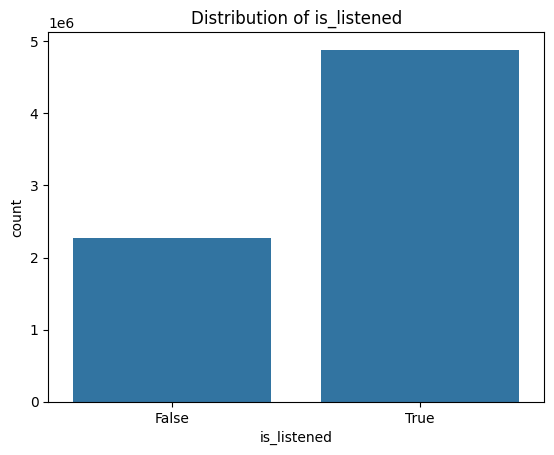

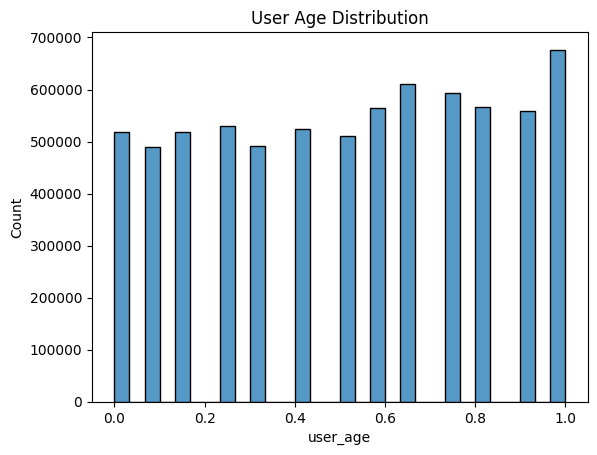

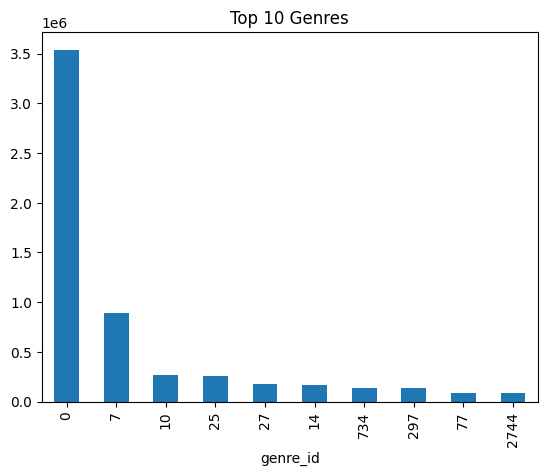

Data preparation complete. Cleaned dataset saved.


In [8]:
## 6. Save cleaned data for further processing
df.to_csv('/content/drive/MyDrive/Recommender_Systems/train_preprocessed.csv', index=False)

print("Data preparation complete. Cleaned dataset saved.")